In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# テストデータの準備
df = pd.read_csv('/Users/yuya/Desktop/Python_Static/python_stat_sample/data/ch4_scores400.csv')
scores = np.array(df['点数'])

In [3]:
# 答えとなる母平均μと母分散σ^2を求める
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

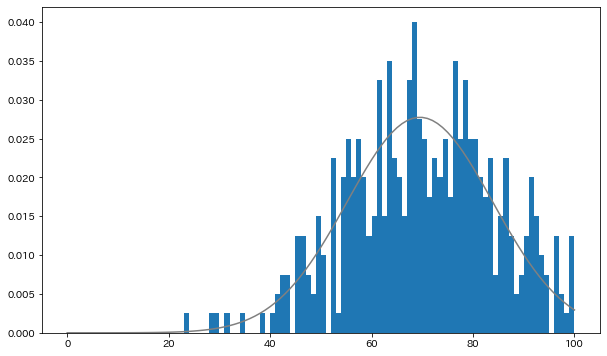

In [4]:
# 8章で説明した通り、受験者の数が多いテストの点数は正規分布に従っていると近似できる
# これより母集団が正規分布に従っている事を仮定して推定を行う
#
# 正規分布という仮定が妥当なのか、全生徒の点数ヒストグラムと正規分布を重ねて図示する

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [5]:
# Aさんが無作為抽出した20人分の標本データを用意する
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [6]:
# サンプルサイズ20の標本データ1万組を用意
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

In [7]:
# 点推定
# →母平均や母分散といった母数を1つの数値で推定する
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}回目の標本平均: {s_mean: .3f}')

1回目の標本平均:  67.000
2回目の標本平均:  72.850
3回目の標本平均:  69.200
4回目の標本平均:  64.450
5回目の標本平均:  72.650


In [8]:
# 　推定料の期待値が推測したい母数になる性質を不偏性といい、
# 不偏性を持っている推定量のことを不偏推定量という
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

In [9]:
# サンプルサイズnを増やしていくと推測したい母数に収束する性質を一致性と呼ぶ
# 一致性を持った推定量の事を一致推定量と呼ぶ

# サンプルサイズを100万にしたときの標本平均
np.mean(np.random.choice(scores, int(1e6)))

69.542954

In [10]:
# Aさんが抽出した標本で標本平均を計算
s_mean = np.mean(sample)
s_mean

70.4

In [11]:
# 標本平均が母平均の良い推定量だったので、分散についても確かめる
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}回目の標本分散: {s_var:.3f}')

1回目の標本分散: 116.800
2回目の標本分散: 162.928
3回目の標本分散: 187.060
4回目の標本分散: 149.148
5回目の標本分散: 111.528


In [12]:
# 標本分散が母分散の不偏推定量になっているか、
# 大数の法則で確かめる
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.34417850000003

In [13]:
# 上記の結果から標本分散は母分散の不偏推定量ではないと考えられる
# 母分散の不偏推定量になるのは不偏分散である
# →標本分散の割る数をn→n-1にして求めた値
#
# 尚、ここで割る数nの事を自由度と呼ぶ
# →自由に値を取ることができる変数の数
# 分散の式の場合、各Xiが平均Xを満たしながら動く必要があるため、自由度が1減る
#
# 不偏推定量にするために自由度で割るのはよくある事らしい

# Numpyで不偏分散を求める
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.67808263157895

In [14]:
# サンプルサイズを100万にした場合
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.08336592317

In [15]:
# Aさんが抽出した標本で、不偏分散を計算
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

In [16]:
# 母分散が既知のときの母平均の信頼区間
# X1、X2....Xn〜N(μ、σ^2)とする。
# このとき母平均σ^2が既知であれば、信頼区間100(1-α)%の信頼区間は
# X-Zα/2(σ^2 / n)^0.5 , X-Z1-α/2(σ^2 / n)^0.5
#  となる。

# e.g. 母平均の95%信頼区間が[64.1, 76.7]、母平均が69.53
# →同じ方法で100回標本抽出〜区間推定した時に95回は母平均が含まれるの意

# Aさんの得た標本データを使って母平均の95%信頼区間を求める
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(64.09956018535247, 76.70043981464754)

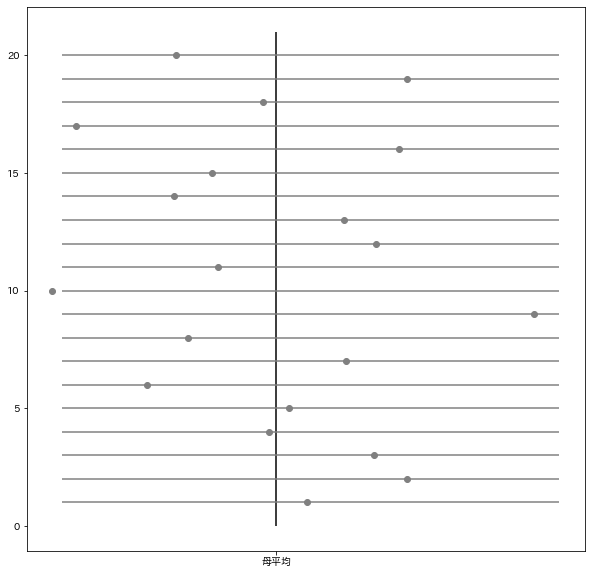

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl,  color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl,  color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['母平均'])

plt.show()

In [18]:
# 1万回信頼区間の計算をして、
# 信頼区間に母平均が何%含まれたか計算する
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ -rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.951

In [19]:
# 母分散の区間推定
# 不偏分散を変換してカイ二乗分布とする
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

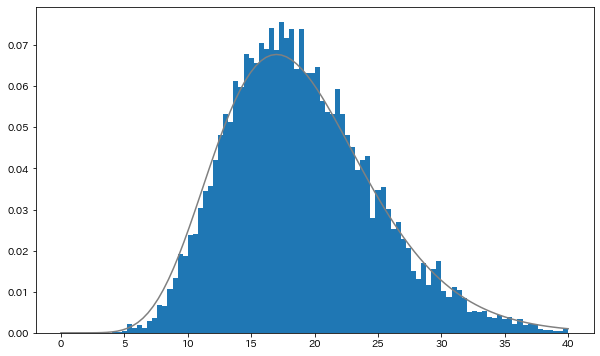

In [20]:
# Yの標本データのヒストグラムとともにχ^2(n-1)の密度関数を図示
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100, range=(0, 40), density=True)

plt.show()

In [21]:
# Aさんの標本データを使って95%信頼区間を求める
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(91.52471947132238, 337.5955129124592)

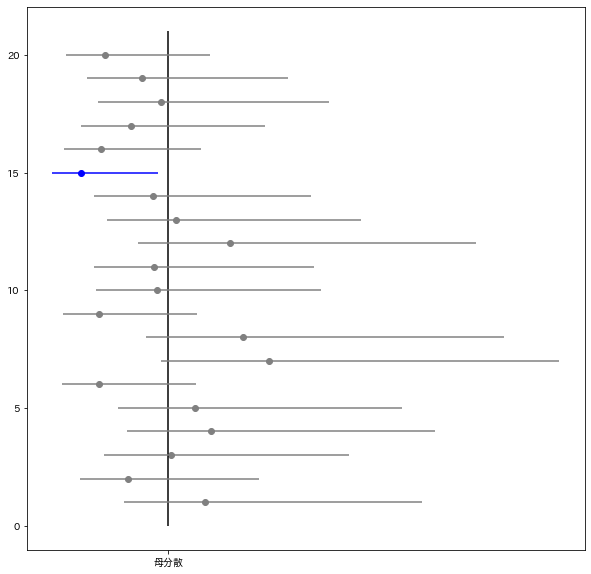

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['母分散'])

plt.show()

In [23]:
# 1万回信頼区間の計算をして、
# 信頼区間に母分散が何%含まれたか計算する
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
cnt / len(samples)

0.964

In [24]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_var / n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_var / n)

lcl, ucl

(65.45745985695861, 75.3425401430414)

In [25]:
# 政権の支持率や国民の喫煙率などといった
# Yes or Noで答えられるような2値変数をとる分布は
# 正規分布では扱えない(正規分布は実数全体を定義域ともつので)
# こういった分布ではベルヌーイ分布を用いて推定を行う

# 「とある企業の出している商品Aを知っているか」という街頭アンケートを
# 全国1000人から回答を得たデータを分析する
enquete_df = pd.read_csv('/Users/yuya/Desktop/Python_Static/python_stat_sample/data/ch10_enquete.csv')
enquete = np.array(enquete_df['知っている'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [26]:
# 点推定
s_mean = enquete.mean()
s_mean

0.709

In [27]:
# 母平均の95%信頼区間を求める
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.6808474522924337, 0.7371525477075662)

In [28]:
# あるサイトの1時間ごとのアクセス数が過去72時間分入ったデータの分析
n_access_df = pd.read_csv('/Users/yuya/Desktop/Python_Static/python_stat_sample/data/ch10_access.csv')
n_access = np.array(n_access_df['アクセス数'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8])

In [29]:
s_mean = n_access.mean()
s_mean

10.444444444444445

In [30]:
# ポアソン分布の母平均の95%信頼区間
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.697953549598202, 11.190935339290688)